In [192]:
import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# 1. Regressao Linear

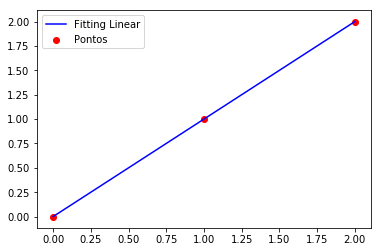

ω = [0.5 0.5]


In [60]:
#-------Regressao Linear ---------------------
reg = linear_model.LinearRegression()
reg.fit([[0,0],[1,1],[2,2]],[0,1,2])
coef_1 = reg.coef_
#-----Plotting---------------------------------------
plt.figure()
plt.scatter([0,1,2],[0,1,2], c='red', label='Pontos')
plt.plot([0,1,2],c='b', label='Fitting Linear')
plt.legend()
plt.show()
#--------Statistics-----------------------------
print('\u03C9 =',coef_1)

## 1.1.1Exemplo por Gradiente

Coeficiente: [938.23786125]
Erro quadratico medio: 2548.07
Coeficiente de determinacao: 0.47


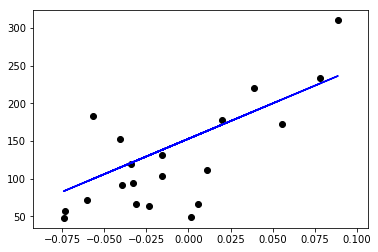

In [76]:
#----Chamando os dados------
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis,2] #Faz 2D Array
#-----Sample------
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
#----Target------
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
#------Model-------
reg = linear_model.LinearRegression()
#------Fitting-------
reg.fit(diabetes_X_train,diabetes_y_train)
#------Prediction---------
diabetes_y_pred = reg.predict(diabetes_X_test) 
#------Coeficientes----------
print('Coeficiente:', reg.coef_)
print('Erro quadratico medio: %.2f' % mean_squared_error(diabetes_y_test,diabetes_y_pred))
print('Coeficiente de determinacao: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue')
plt.show()

## 1.1.1. Metodo de regressao Linear Quadratica

Usa-se na presenca de Outliers

**Gerar Dataset:**
1. *n_features*: Numero de caracteristicas a considerar
2. *noise*: Derivacao em relacao a reta
3. *n_samples*: Numero de amostra

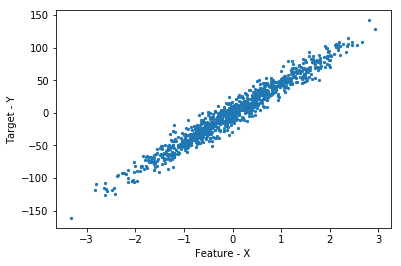

coef:  [44.76935178]
Intercept:  -0.17779964240275908


In [113]:
#Gerando Dataset-----------------
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)
#Plotting dataset-----------
f = plt.figure()
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)
plt.show()
#---Regrassao Linear----
lr = LinearRegression()
#---Modelo de Treinamento----
lr.fit(X,Y)
#----Coeficientes----
print('coef: ', lr.coef_)
print('Intercept: ', lr.intercept_)

**Predicao usando o modelo treinado**
* Pontos azul resenta o atual Target
* Pontos laranja representam os dados previstos

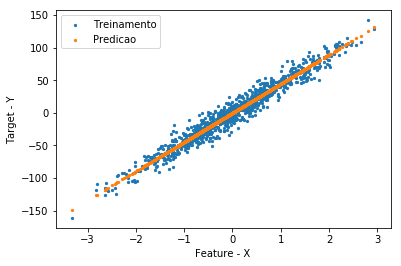

In [114]:
#Precicao-----
pred = lr.predict(X)
#---Graficos-----
f = plt.figure()
plt.scatter(X,Y,s=5, label='Treinamento')
plt.scatter(X,pred, s=5, label='Predicao')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

## 1.2. Modelo de Regressao Regularizada
**Add Outliers**

In [119]:
#----Add Outliers------
ridge = Ridge(alpha=.1)
outliers = Y[950:] - 600
Y_out = np.append(Y[:950], outliers)
#plt.scatter(X,Y_out,s=5)

**Modelo quadratico**

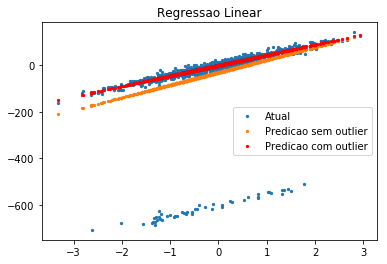

Coef:  [54.07075382]


In [122]:
lr = LinearRegression()
lr.fit(X,Y_out)
pred_out = lr.predict(X)
#--Plotting------------
f = plt.figure()
plt.scatter(X,Y_out,s=5, label = 'Atual')
plt.scatter(X,pred_out,s=5,label='Predicao sem outlier')
plt.scatter(X,pred,s=5,c='r', label='Predicao com outlier')
plt.legend()
plt.title('Regressao Linear')
plt.show()
#--Coeficientes-----------------
print('Coef: ', lr.coef_)

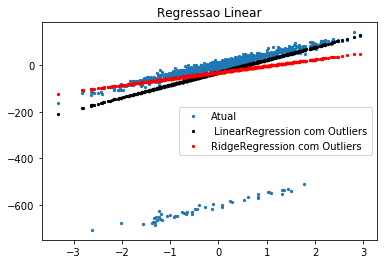

coef Ridge:  [27.57006817]


In [128]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1000)
ridge.fit(X,Y_out)
pred_ridge = ridge.predict(X)
#---Plotting----------
f = plt.figure()
plt.scatter(X, Y_out, s=5, label='Atual')
plt.scatter(X, pred_out, s=5, c='k', label=' LinearRegression com Outliers')
plt.scatter(X, pred_ridge, s=5, c='r', label = 'RidgeRegression com Outliers')
plt.legend()
plt.title('Regressao Linear')
plt.show()
#----Coeficientes---
print('coef Ridge: ', ridge.coef_)

### 1.2.2 Treinando Ridge para Alphas distintos

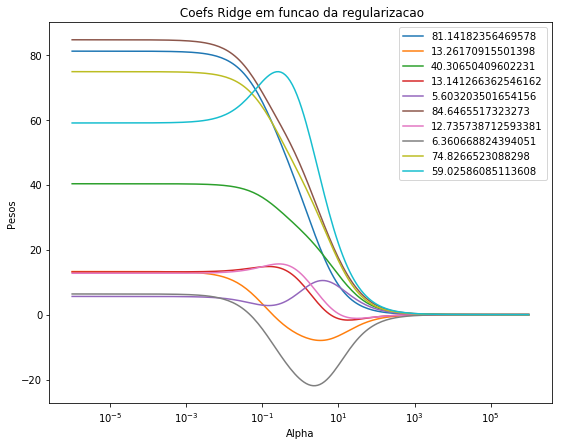

In [177]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5)
#------------------------------
alphas = np.logspace(-6, 6, 200)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)
    
#-----------------------
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,7)
ax = plt.gca()
j = ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Pesos')
plt.title(' Coefs Ridge em funcao da regularizacao')
plt.legend(j, coefs[11])

plt.show()

**Conclusao**
* Conforme Alpha tende a 0, os coeficientes Ridge estabiliza em w
* Para alphas muito grandes, os coeficientes sao menores e convergem a 0

## 1.3 Lasso

* Modelo linear que faz predicao dos coeficientes Sparse
* Reduz o regressor fazendo predicao do target

In [179]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit([[0,0],[0,0],[1,1]],[0,.1,1])
print('Coef Lasso: ', lasso.coef_)

Coef Lasso:  [0.5 0. ]


## 1.4. Elastic Net

* O Elastic-Net e util quando existem multiplas caracteristicas que estao correlacionadas.
* Lasso pega uma caracteristica aleatoria, enquanto Elastic-net pega ambas

In [180]:
from sklearn.linear_model import ElasticNet
e_n = ElasticNet(alpha=.1)
e_n.fit([[0,0],[0,0],[1,1]], [0,.1,1])
print('Coef Elastic-Net: ', e_n.coef_)

Coef Elastic-Net:  [0.32589556 0.32579954]


# 2 Regressao Logaritma

$$y = \frac{e^{b_0 + b_1 \dot x} }{1 + e^{b_0 + b_1 \dot x}}$$
* Retorna probabilidades
* Hiper-Parametro: C - coef de regularizacao
* Aplicado em classificacao bi-class

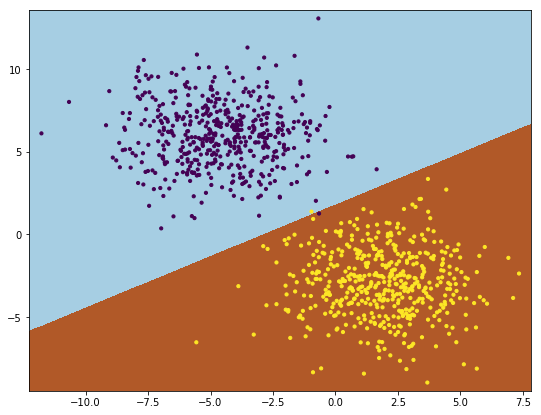

In [193]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
#-----------------------------------
X, y = make_blobs(n_features=2, n_samples=1000, cluster_std=2, centers = 2)
#---------Plotting----------------------
#f = plt.figure()
#plt.scatter(X[:,0], X[:,1], c=y, s=10)
#plt.show()
#-------------------------------------
h = .02
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
#---------------------------------------
lr = LogisticRegression()
lr.fit(X,y)
Z = lr.predict(np.c_[xx.ravel(),yy.ravel()])
#--------------------------------------
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, s=10)
plt.show()